<a href="https://colab.research.google.com/github/tugcegulsanusta/machine-learning-project/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Explore data



In [8]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head()


In [ ]:
#count NaN
df.isna().sum()

# Clear data

In [ ]:
df = df.dropna(axis = 1)
df = df.drop('id', axis= 1)
df.shape
df.head()

In [ ]:
#count the class results
df['diagnosis'].value_counts()


In [ ]:
#replace data M -> 1, B -> 0
df['diagnosis'] = df['diagnosis'].replace(['M'], '1')
df['diagnosis'] = df['diagnosis'].replace(['B'], '0')
df['diagnosis'] = df['diagnosis'].astype('int')

df.info()

In [39]:
#drop the diagnosis(Diagnosis is our class label and store it in  'y')
y = df.diagnosis
X = df.drop('diagnosis', axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Explore relations

In [ ]:
#first 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((x- x.mean())/x.std()).iloc[:,0:15]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data= data)
plt.xticks(rotation=90)


In [ ]:
#last 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((x-x.mean())/x.std()).iloc[:,15:31]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data=data)
plt.xticks(rotation=90)

In [ ]:
#find correlation between diagnosis and attributes
df.corr()['diagnosis'].sort_values()

In [ ]:
#find correlation between attributes
#correlation heatmap
plt.figure(figsize = (40,40))
sns.heatmap(df.iloc[:, 1:31].corr(), annot = True, linewidths = 1, cmap='Blues')

In [ ]:
#drop correlated columns

x_v1 = x.drop(['perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst', 'area_worst','texture_worst', 'concavity_mean','perimeter_se', 'area_se', 'concave points_worst' ], axis= 1)

x_v1.shape

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(x_v1.iloc[:, 1:21].corr(), annot = True, linewidths = 1, cmap= 'Blues')

In [ ]:
#drop 0.80 korrelated and above
x_v2 = x_v1.drop(['compactness_mean','concavity_worst','fractal_dimension_worst', 'concavity_se', 'fractal_dimension_se', 'smoothness_mean'], axis= 1)

x_v2.shape

<Axes: >

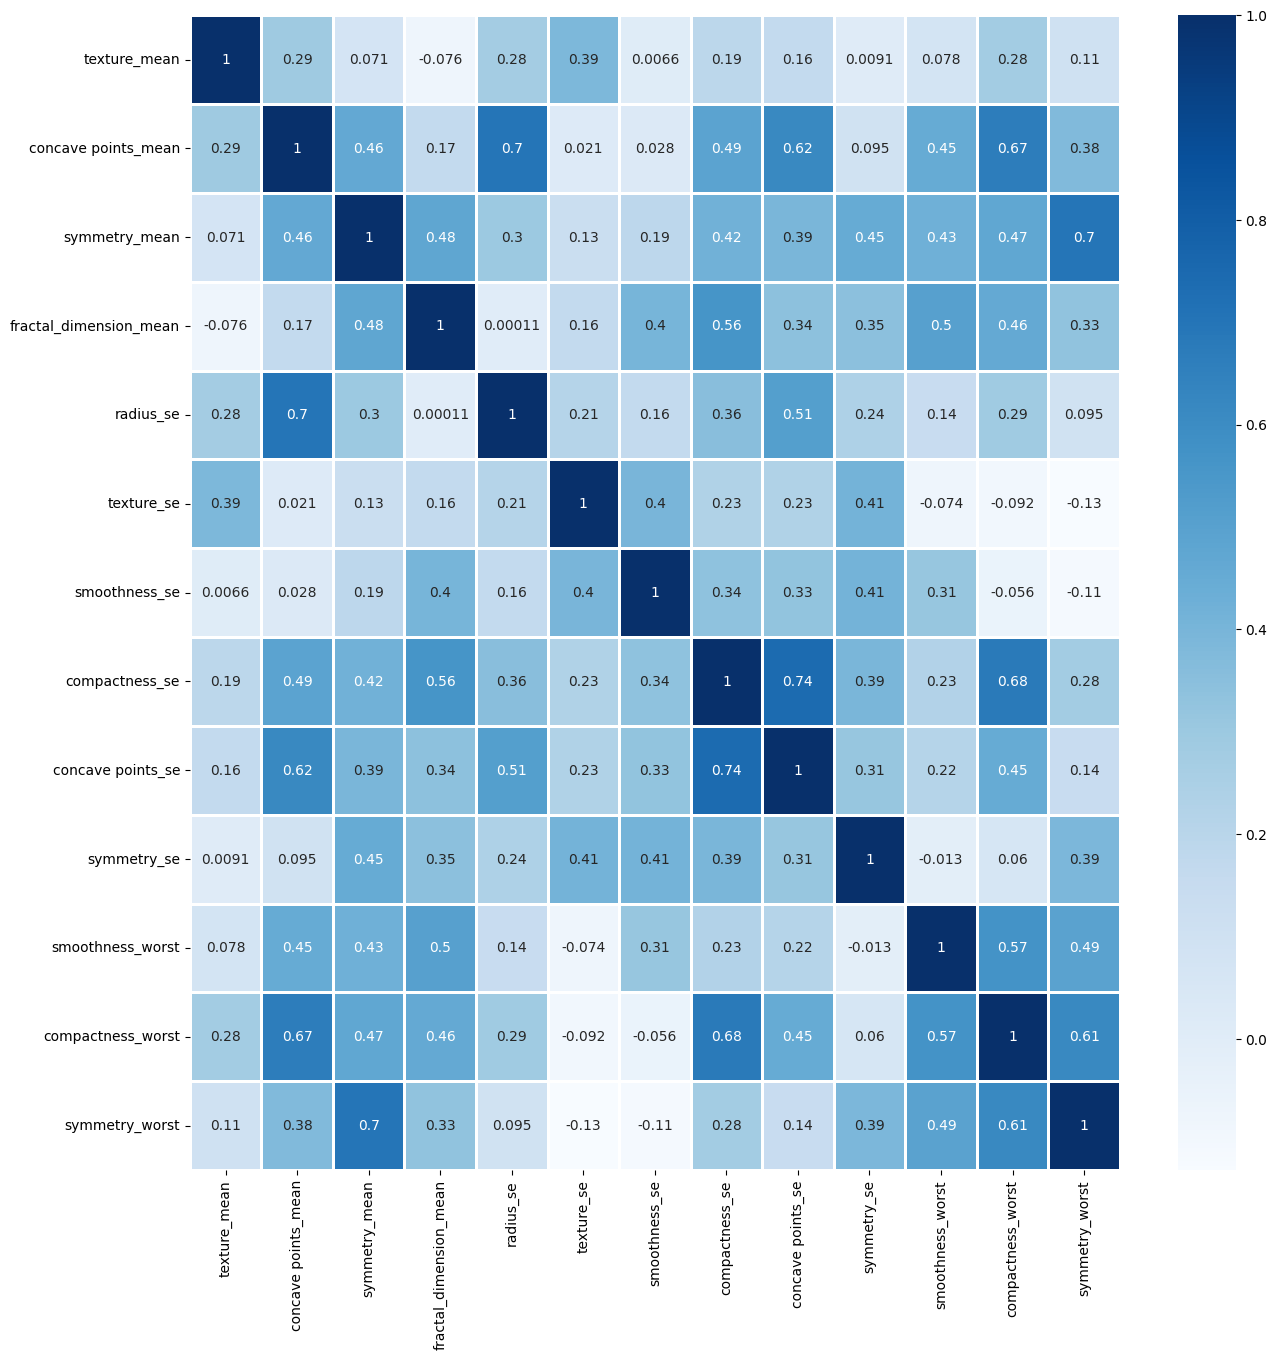

In [22]:
plt.figure(figsize = (15,15))
sns.heatmap(x_v2.iloc[:, 1:15].corr(), annot = True, linewidths = 1, cmap= 'Blues')

#Split data for cross validation

#Test w randomforest

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


In [59]:
clf= DecisionTreeClassifier()
def crossval_calculator(scores):
  total = 0
  for x in scores:
    total+=x
  mean_score = total/scores.size
  return mean_score

In [60]:
k_folds = KFold(n_splits = 10)
scores1 = cross_val_score(clf, x_v1, y, cv= k_folds )
scores2 = cross_val_score(clf, x_v2, y, cv= k_folds )

print(crossval_calculator(scores1))
print(crossval_calculator(scores2))

0.9279448621553884
0.9315162907268169



Use random forrest on data v1


Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


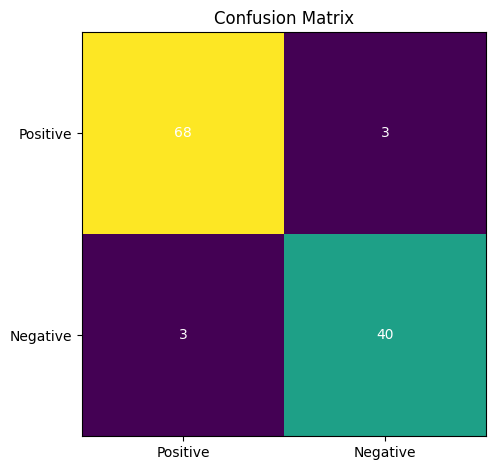

In [24]:
#split data
x_train, x_test, y_train, y_test= train_test_split(x_v1, y, test_size= 0.2, random_state=None)
#use Random Forest Classifier
rf_classifier= RandomForestClassifier(random_state=None)
rf_classifier= rf_classifier.fit(x_train, y_train)
#calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, rf_classifier.predict(x_test))
print('Accuracy: ' +str(accuracy))
confusion_m = confusion_matrix(y_test, rf_classifier.predict(x_test))

#visualize results
fig, ax = plt.subplots()
list_pos=['Positive', 'Negative']
list_ne =['Positive', 'Negative']
im = ax.imshow(confusion_m)
ax.set_xticks(np.arange(len(list_pos)),labels=list_pos)
ax.set_yticks(np.arange(len(list_ne)),labels=list_ne)
plt.setp(ax.get_xticklabels(), rotation=0)

for i in range(len(list_pos)):
  for j in range(len(list_ne)):
    text= ax.text(j,i,confusion_m[i, j], ha='center', va='center', color='w')

ax.set_title('Confusion Matrix')
fig.tight_layout()



print(confusion_m)
plt.show()



Use random forrest on data v2

In [ ]:
#split data
x_train, x_test, y_train, y_test= train_test_split(x_v2, y, test_size= 0.2, random_state=None)
#use Random Forest Classifier
rf_classifier= RandomForestClassifier(random_state=None)
rf_classifier= rf_classifier.fit(x_train, y_train)
#calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, rf_classifier.predict(x_test))
print('Accuracy: ' +str(accuracy))
confusion_m = confusion_matrix(y_test, rf_classifier.predict(x_test))


#visualize results
fig, ax = plt.subplots()
list_pos=['Positive', 'Negative']
list_ne =['Positive', 'Negative']
im = ax.imshow(confusion_m)
ax.set_xticks(np.arange(len(list_pos)),labels=list_pos)
ax.set_yticks(np.arange(len(list_ne)),labels=list_ne)
plt.setp(ax.get_xticklabels(), rotation=0)

for i in range(len(list_pos)):
  for j in range(len(list_ne)):
    text= ax.text(j,i,confusion_m[i, j], ha='center', va='center', color='w')

ax.set_title('Confusion Matrix')
fig.tight_layout()
print(confusion_m)
plt.show()



# Test w Logistic Regression

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x1_train, x1_test, y1_train, y1_test= train_test_split(x_v1, y, test_size= 0.2, random_state=None)
x1_train= scaler.fit_transform(x1_train)
x1_test= scaler.transform(x1_test)

x2_train, x2_test, y2_train, y2_test= train_test_split(x_v2, y, test_size= 0.2, random_state=None)
x2_train=scaler.fit_transform(x2_train)
x2_test= scaler.transform(x2_test)

In [79]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(x1_train, y1_train)
lr2= LogisticRegression()
lr2.fit(x2_train, y2_train)

LogisticRegression()

In [86]:
from sklearn.metrics import classification_report
print('Accuracy for first train data: ' , accuracy_score(y1_train, lr1.predict(x1_train)))
print('Accuracy for first test data: ', accuracy_score(y1_test, lr1.predict(x1_test)))

print('\nAccuracy for second train data: ', accuracy_score(y2_train, lr2.predict(x2_train)))
print('Accuracy for second test data: ', accuracy_score(y2_test, lr2.predict(x2_test)))

Accuracy for first train data:  0.9868131868131869
Accuracy for first test data:  0.9649122807017544

Accuracy for second train data:  0.9736263736263736
Accuracy for second test data:  0.9824561403508771
